<a href="https://colab.research.google.com/github/shuvoedward/Machine-learning/blob/master/knn_classified_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import io # to read in the data
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.preprocessing import StandardScaler

In [2]:
# importing data to collab notebook 
from google.colab import files
uploaded = files.upload()

Saving Classified Data to Classified Data


In [8]:
# reading in the classified data to data file
data = pd.read_csv(io.StringIO(uploaded["Classified Data"].decode('utf-8')), sep=',', index_col=0)

In [9]:
# looking at the head of data
data.head(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


In [10]:
# anonymised classified data
# use all this features to predict the target class
# standardized all the data on the same scale

# creating an instance of standard scaler
scaler = StandardScaler()

# fitting the data without the target class to scaler
scaler.fit(data.drop('TARGET CLASS', axis =1))

# transforming the scaler object
scaled_feature = scaler.transform(data.drop('TARGET CLASS', axis =1))

In [11]:
scaled_feature # scaled or standardized values of the actual values

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [13]:
# using the scaled feature as a new dataset, so i can use the new dataset to train on
# columns name are everything but the last column of the actual data
# no TARGET CLASS in scaled_feature

data_feat = pd.DataFrame(scaled_feature,columns=data.columns[:-1]) 


In [14]:
data_feat.head(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
5,-0.399853,1.591707,0.928649,1.477102,0.308440,0.263270,1.239716,0.722608,-2.206816,0.809900
6,-0.017189,0.534949,0.826189,-1.723636,-0.147547,-2.010505,-0.206348,-1.096313,-0.158215,-1.233974
7,-0.461182,-0.100835,0.210071,-1.909291,-0.366695,0.396875,0.718122,0.934523,0.228458,0.308929
8,-0.598054,1.360189,-0.172618,-1.502292,-1.192485,0.504787,-0.325981,0.834346,-0.136536,-0.670199
9,-0.612806,-2.331876,0.197211,1.127356,1.636853,-0.225233,0.948308,-1.644881,1.309064,-1.865764


In [16]:
# knn depends on the distance between each feature

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_feat, data['TARGET CLASS'], test_size = .3)



In [18]:
# importing knn
from sklearn.neighbors import KNeighborsClassifier

# findign the best k value
error_rate = []

for i in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

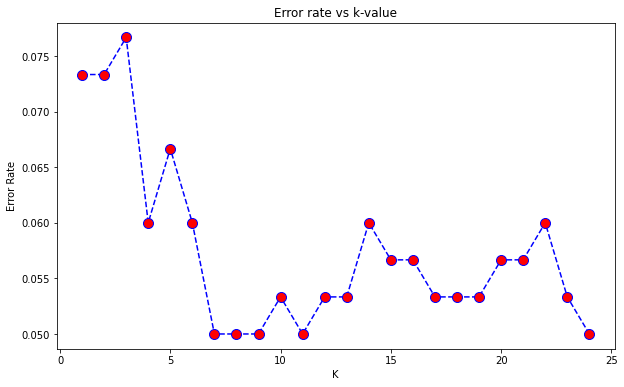

In [21]:
# visualizing the error_rate
plt.figure(figsize=(10,6))
plt.plot(range(1,25), error_rate, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor = 'red', markersize=10) # plotting range(1,25) vs error rate
plt.title('Error rate vs k-value')
plt.xlabel('K')
plt.ylabel('Error Rate')      